<a href="https://colab.research.google.com/github/adinsa1/Data110/blob/main/Assefa2Data201Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction
    The Project is one of the requirements of DATA201. We are handling the Project grouped into three:
    1.1 Assefa and Xutong will handle the 'Introduction' part.
    1.2 Nandini and Yoseph will handle the 'EDA and Visualization' section.
    1.3 Adi will handle 'Simulation and Bootstrapping'.
    1.4 We wiil handle the 'Conclusion' all together.

# 2.Project Title: US Contagious Disease

# 3.Purpose of the Project:
     3.1 Indentify appropriate dataset and import it.
     3.2 Carry out Exploratory Data Analysis.
     3.3 Find out any unique condition and point out Findings.
     3.4 Conclusion.

# 4. Source of the Dataset: us_contagious_diseases.csv

# 5. Load Libraries:









In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 6. Import the Dataset

In [2]:
# import the Dataset

df = pd.read_csv('https://raw.githubusercontent.com/yosephhabtu/US-Contagious-Diseases/main/us_contagious_diseases.csv')


# 6.1 View pertinent information about the Dataset:

In [3]:
# View if there is NA:
df.isna().any()

disease            False
state              False
year               False
weeks_reporting    False
count              False
population          True
dtype: bool

In [4]:
# View in which Columns there is NA:
df.count()

disease            18870
state              18870
year               18870
weeks_reporting    18870
count              18870
population         18666
dtype: int64

NOTE: There are about 204 missing data in the 'Population' Column.

In [5]:
# View the First Five Lines of the Dataset:
df.head()

,disease,state,year,weeks_reporting,count,population
0,Hepatitis A,Alabama,1966,50,321,3345787.0
1,Hepatitis A,Alabama,1967,49,291,3364130.0
2,Hepatitis A,Alabama,1968,52,314,3386068.0
3,Hepatitis A,Alabama,1969,49,380,3412450.0
4,Hepatitis A,Alabama,1970,51,413,3444165.0


In [6]:
# View the Last Five Lines of the Dataset:
df.tail()

,disease,state,year,weeks_reporting,count,population
18865,Smallpox,Wyoming,1949,0,0,285544.0
18866,Smallpox,Wyoming,1950,1,2,290529.0
18867,Smallpox,Wyoming,1951,1,1,295744.0
18868,Smallpox,Wyoming,1952,1,1,301083.0
18869,Smallpox,Wyoming,1953,0,0,306410.0


In [7]:
# View the statistical characterstics of the Dataset:
df.describe()

,year,weeks_reporting,count,population
count,18870.000000,18870.000000,18870.000000,1.866600e+04
mean,1974.100000,33.281558,1367.530578,4.242911e+06
std,21.776419,20.105653,5506.530241,4.804728e+06
min,1928.000000,0.000000,0.000000,8.685300e+04
25%,1956.000000,14.000000,1.000000,1.046542e+06
50%,1977.000000,44.000000,47.000000,2.824918e+06
75%,1992.000000,50.000000,440.750000,5.153640e+06
max,2011.000000,52.000000,132342.000000,3.760752e+07


NOTE: The Dataset has 18870 Raws and 6 Columns

# 7. Exploratory Data Analysis of some areas of interest:

In [8]:
# Observation type of disease by total case
df.disease.value_counts()

Measles        3876
Pertussis      3774
Polio          3774
Hepatitis A    2346
Rubella        1938
Mumps          1836
Smallpox       1326
Name: disease, dtype: int64

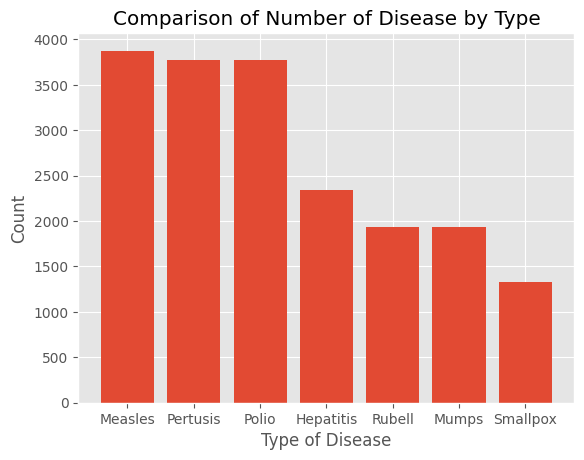

In [9]:
# Bar Graph - Comparison of Number of Disease by Type
x = ['Measles', 'Pertusis', 'Polio', 'Hepatitis', 'Rubell', 'Mumps', 'Smallpox']
y = [3876,3774,3774,2346,1938,1936,1326]
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.bar(x,y)
plt.xlabel('Type of Disease')
plt.ylabel('Count')
plt.title('Comparison of Number of Disease by Type')
plt.show()


In [10]:
# Explore the correlation between count_mean by state and mean_population:
by_state = df.groupby(['state']).mean()[['count', 'population']].rename(columns = {'count':'mean_count', 'population':'mean_pop'})
by_state

<ipython-input-10-129fcdf262c8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_state = df.groupby(['state']).mean()[['count', 'population']].rename(columns = {'count':'mean_count', 'population':'mean_pop'})


,mean_count,mean_pop
state,,
Alabama,749.875676,3.689245e+06
Alaska,80.002703,4.716158e+05
Arizona,712.600000,2.651265e+06
Arkansas,525.129730,2.202317e+06
California,5441.713514,2.199560e+07
Colorado,945.497297,2.673458e+06
Connecticut,1343.316216,2.839231e+06
Delaware,129.381081,5.563034e+05
District Of Columbia,226.891892,6.631107e+05


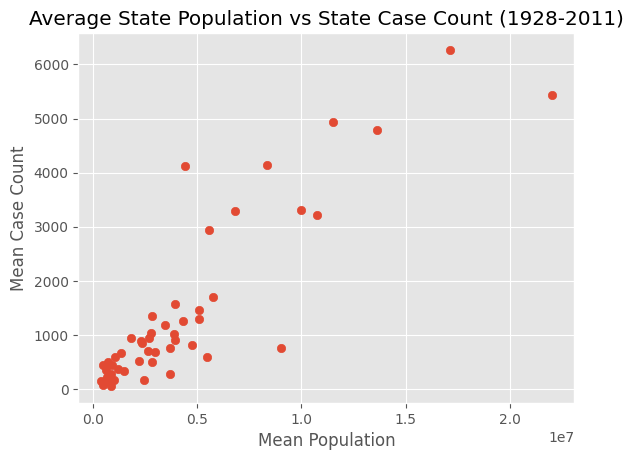

In [11]:
# Plot Scatter plot to view the relationship:
x = by_state.mean_pop
y = by_state.mean_count

plt.scatter(x, y)
plt.xlabel('Mean Population')
#plt.ticklabel_format(style='plain')
plt.ylabel('Mean Case Count')
plt.title('Average State Population vs State Case Count (1928-2011)')

#import numpy as np
#slope, intercept = np.polyfit(x, y, 1)
#plt.plot(x, slope*x + intercept)
plt.show()

NOTE: There is strong relationship.

In [36]:
#  Calculation of the correlation coefficient:
r = np.corrcoef(x, y)[1,0]
r

0.8856388004745153

NOTE: The Correlation Coefficient is almost 0.9, which means the average case
      by state is correlated the the respective population mean.